# <font color='dark'>**Seleção e agrupamento de dados com pandas**</font>

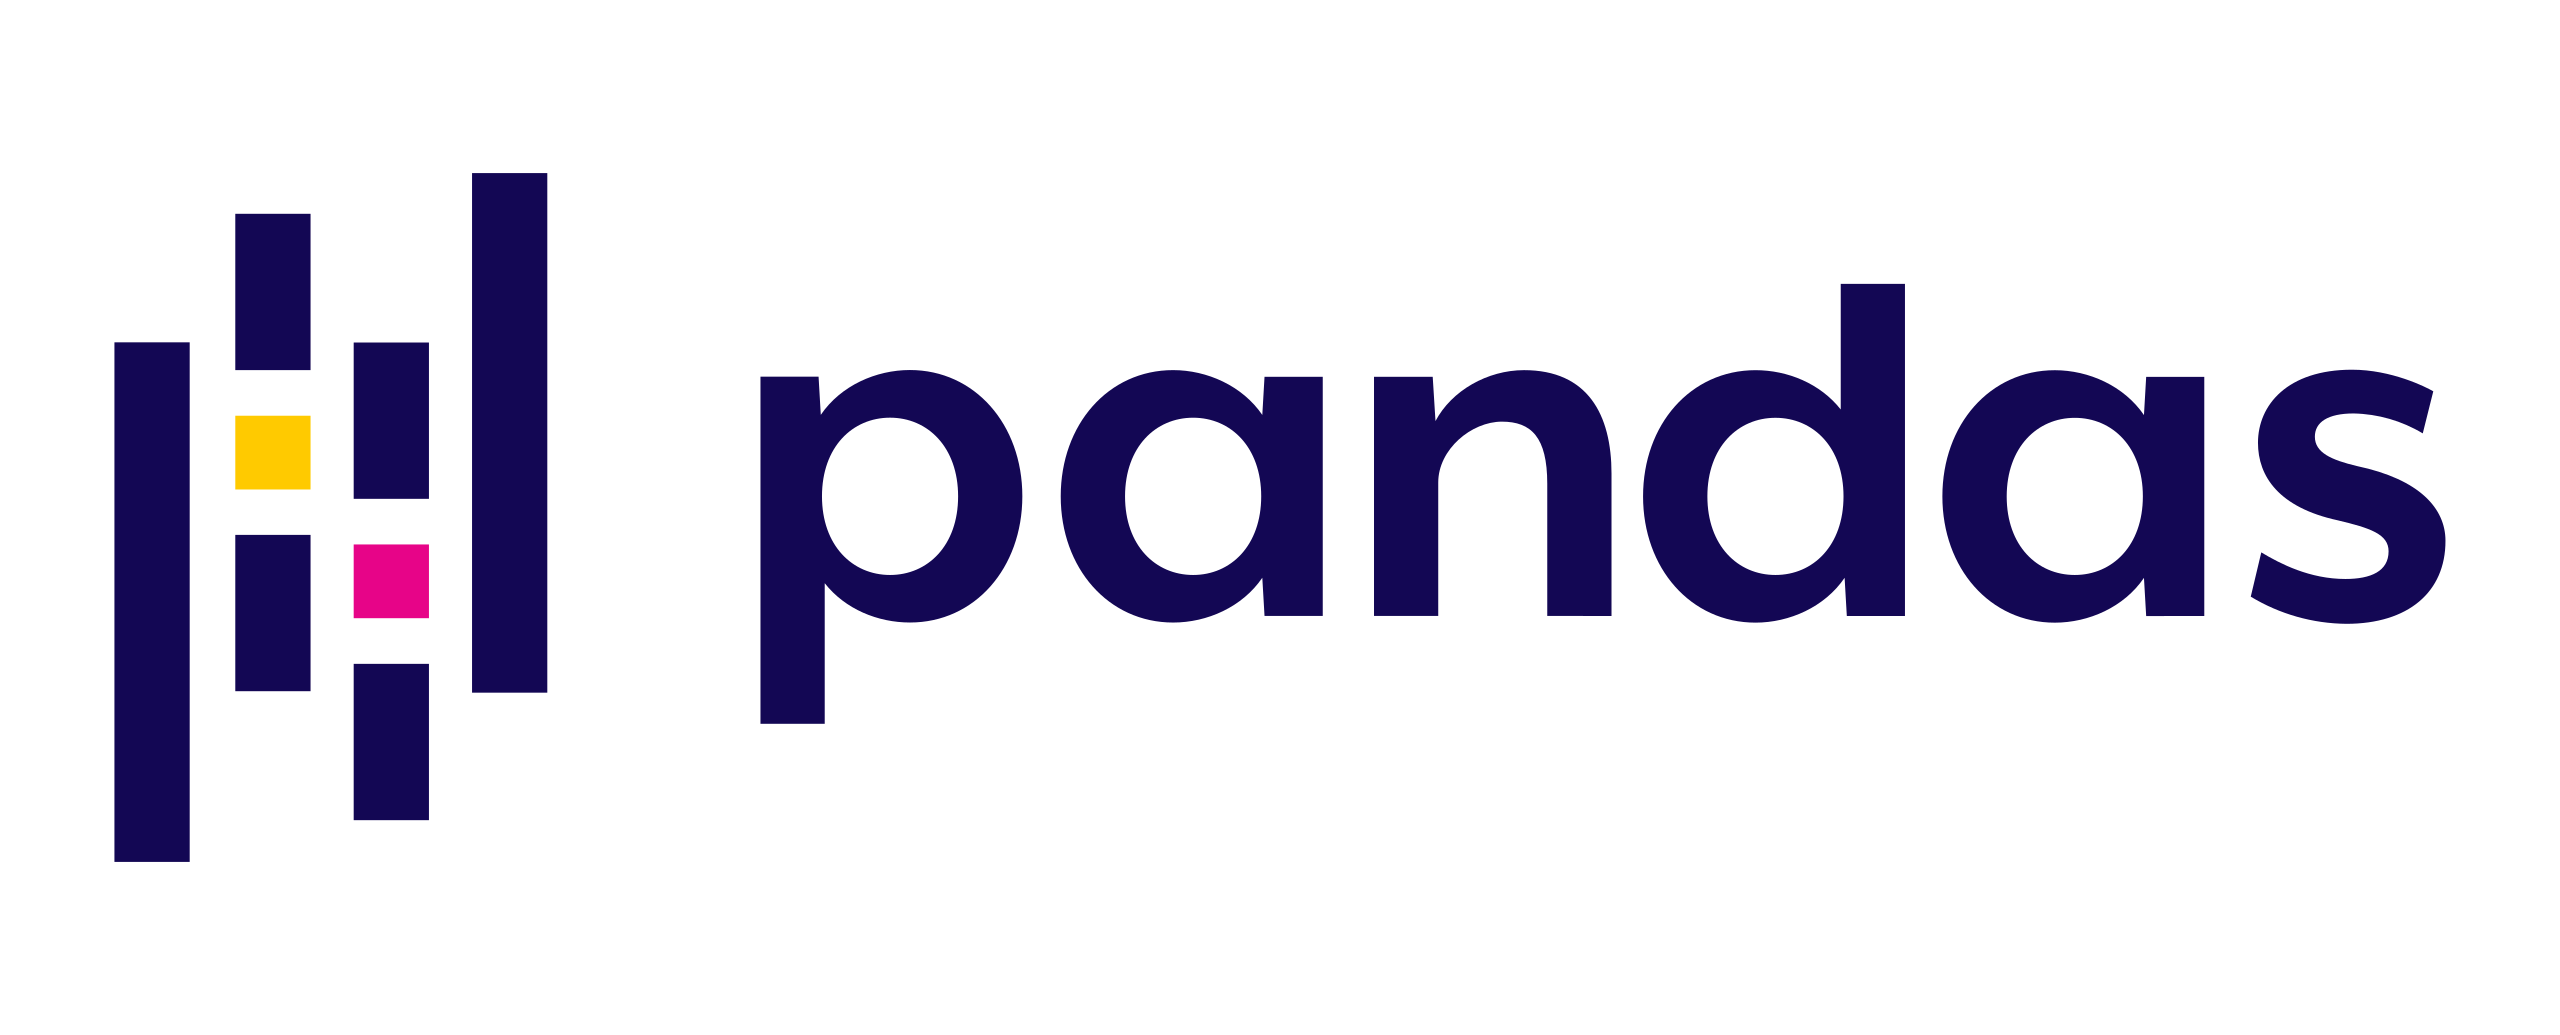

### Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](http://seeg.eco.br/download)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
import pandas as pd
url = 'https://github.com/rgrAndrade/Analise_de_Gases_de_Efeito_Estufa/blob/main/Dados/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx?raw=True'
df = pd.read_excel(url)
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Base de Dados de Estimativa de Emissões de Gas...
2,NaN,NaN,NaN,NaN,NaN,SEEG 10
3,NaN,NaN,NaN,NaN,NaN,Novembro 2022
4,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
emissoes_gases = pd.read_excel(url, sheet_name='GEE Estados')
emissoes_gases.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

In [3]:
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
ℹ
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

---

In [4]:
emissoes_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

In [5]:
(emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção')

,Emissão / Remoção / Bunker
0,False
1,False
2,False
3,False
4,False
...,...
103307,False
103308,False
103309,False
103310,False


In [6]:
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [7]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar se todos os valores são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [8]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

,0
1970,0.0
1971,0.0
1972,0.0
1973,0.0
1974,0.0
1975,0.0
1976,0.0
1977,0.0
1978,0.0
1979,0.0


Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

In [9]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == 'Bunkers', 'Estado'].unique()

array([], dtype=object)

In [10]:
emissao_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissao_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [11]:
emissao_gases = emissao_gases.drop(columns='Emissão / Remoção / Bunker')
emissao_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### Modificando o formato do DataFrame


Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [12]:
emissao_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [13]:
colunas_info = list(emissao_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [14]:
emissoes_gases.loc[:, 1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [15]:
colunas_emissao = list(emissoes_gases.loc[:, 1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

In [16]:
emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5372219,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
5372220,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
5372221,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
5372222,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


In [17]:
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

### Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [18]:
emissoes_por_ano.groupby('Gás')

Podemos checar quais dados foram agrupados em cada grupo com uso do atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e realizar seleções de grupos específicos com o método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [19]:
emissoes_por_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 103722, 103723, 103724, 103737, 103738, 103739, 207034, 207035, 207036, 207049, 207050, 207051, 310346, 310347, 310348, 310361, 310362, 310363, 413658, 413659, 413660, 413673, 413674, 413675, 516970, 516971, 516972, 516985, 516986, 516987, 620282, 620283, 620284, 620297, 620298, 620299, 723594, 723595, 723596, 723609, 723610, 723611, 826906, 826907, 826908, 826921, 826922, 826923, 930218, 930219, 930220, 930233, 930234, 930235, 1033530, 1033531, 1033532, 1033545, 1033546, 1033547, 1136842, 1136843, 1136844, 1136857, 1136858, 1136859, 1240154, 1240155, 1240156, 1240169, 1240170, 1240171, 1343466, 1343467, 1343468, 1343481, 1343482, 1343483, 1446778, 1446779, 1446780, 1446793, 1446794, 1446795, 1550090, 1550091, 1550092, 1550105, 1550106, 1550107, 1653402, 1653403, 1653404, 1653417, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 103719, 103720, 103721, 103734, 103735, 103736, 207031, 207032, 207033, 207046, 207047, 207048, 310343, 310344, 3103

In [20]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5372170,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Caatinga,NaN,NaN,NaN,CO2 (t),BR,NaN,NaN,2021,0.000000
5372181,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Cerrado,NaN,NaN,NaN,CO2 (t),BR,NaN,NaN,2021,0.000000
5372192,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Mata Atlântica,NaN,NaN,NaN,CO2 (t),BR,NaN,NaN,2021,0.000000
5372203,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pampa,NaN,NaN,NaN,CO2 (t),BR,NaN,NaN,2021,0.000000


Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

In [21]:
emissoes_por_ano.groupby('Gás')[['Emissão']].sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),8.031840e+08
CO (t),5.118477e+08
CO2 (t),4.153325e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2e (t) GTP-AR6,5.094025e+10


In [22]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum()
emissao_por_gas

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),8.031840e+08
CO (t),5.118477e+08
CO2 (t),4.153325e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2e (t) GTP-AR6,5.094025e+10


In [23]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values('Emissão', ascending = False)
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,7.048576e+10
CO2e (t) GWP-AR6,6.999228e+10
CO2e (t) GWP-AR4,6.882629e+10
CO2e (t) GWP-AR2,6.584700e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR6,5.094025e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2 (t),4.153325e+10


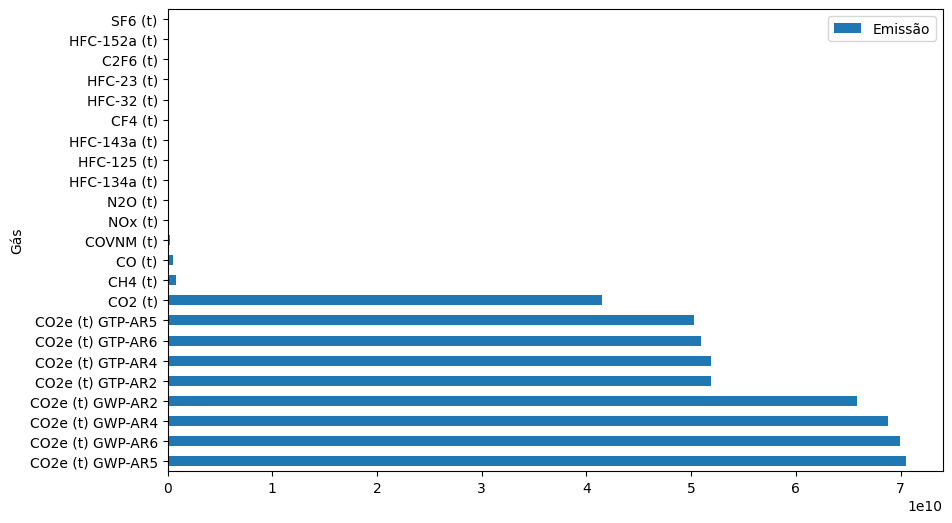

In [24]:
emissao_por_gas.plot(kind = 'barh', figsize = (10,6));

In [25]:
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,7.048576e+10
CO2e (t) GWP-AR6,6.999228e+10
CO2e (t) GWP-AR4,6.882629e+10
CO2e (t) GWP-AR2,6.584700e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR6,5.094025e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2 (t),4.153325e+10


In [26]:
print(f'A emissão de CO2 corresponde a {float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()).iloc[0])*100:.2f} % de emissão total de gases de efeito estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.68 % de emissão total de gases de efeito estufa no Brasil de 1970 a 2021.


### Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

In [27]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.432620e+07
         Mudança de Uso da Terra e Floresta  9.484303e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             1.008308e+08
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

Para descobrir o setor que emite a maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do método *cross-section* [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), extraindo a partir disso o valor máximo e índice máximo com os métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) e [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax).

In [28]:
gas_por_setor.xs('CO2 (t)', level = 0)

,Emissão
Nível 1 - Setor,
Agropecuária,9.676159e+07
Energia,1.304111e+10
Mudança de Uso da Terra e Floresta,2.564301e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [29]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level = [0,1])

,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,2.564301e+10


In [30]:
gas_por_setor.xs('CO2 (t)', level = 0).max()

,0
Emissão,2.564301e+10


In [31]:
gas_por_setor.xs('CO2 (t)', level = 0).idxmax()

,0
Emissão,Mudança de Uso da Terra e Floresta


Para evitar uma forma manual para cada tipo de gás, podemos explorar ainda mais o método `groupby()` em conjunto com o [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

In [32]:
gas_por_setor.groupby(level = 0).idxmax()

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


Por fim, podemos criar uma tabela sumarizada com as informações dos valores máximos de emissão para cada tipo de gás e com a referência do setor com maior emissão de cada gás.

In [33]:
gas_por_setor.groupby(level = 0).max()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.966715e+08
CO2 (t),2.564301e+10
CO2e (t) GTP-AR2,2.699960e+10
CO2e (t) GTP-AR4,2.699960e+10
CO2e (t) GTP-AR5,2.678711e+10
CO2e (t) GTP-AR6,2.690914e+10


In [34]:
valores_max = gas_por_setor.groupby(level = 0).max().values

In [35]:
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão',valores_max)
tabela_sumarizada

,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.966715e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",2.564301e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",2.699960e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",2.699960e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",2.678711e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",2.690914e+10


Podemos alterar a ordem dos níveis de índice para encontrar a outra informação, que nos diz qual o gás mais emitido para cada tipo de setor. Para isso, vamos utilizar o método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

In [36]:
gas_por_setor.swaplevel(0, 1)

Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.432620e+07
Mudança de Uso da Terra e Floresta CH4 (t)   9.484303e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   1.008308e+08
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [37]:
gas_por_setor.swaplevel(0, 1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### Emissão ao longo dos anos

Vamos identificar se as emissões de gases estufas aumentaram ou diminuíram ao longo dos anos e visualizar essa variação para cada tipo de gás emitido separadamente.

In [38]:
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5372219,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
5372220,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
5372221,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
5372222,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


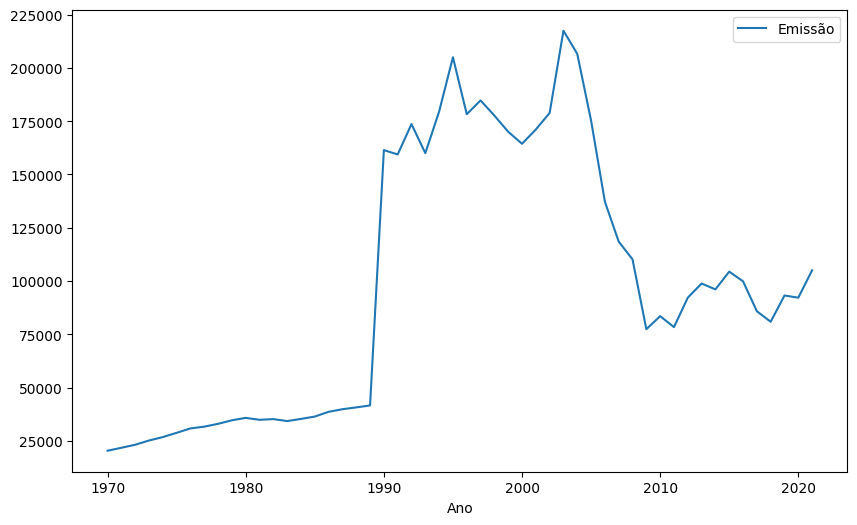

In [39]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(figsize = (10, 6));

In [40]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax()

,0
Emissão,2003


In [41]:
emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean()

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1468.366197
     CO (t)       2154.429254
     CO2 (t)     16208.866464
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.172531
     NOx (t)       744.579232
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [42]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1468.366197
3,1970,CO (t),2154.429254
4,1970,CO2 (t),16208.866464
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.172531
1194,2021,NOx (t),744.579232


In [43]:
media_emissao_anual = media_emissao_anual.pivot_table(index = 'Ano', columns = 'Gás', values = 'Emissão')
media_emissao_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1468.366197,2154.429254,16208.866464,18862.703799,18862.703799,17370.674172,17921.680291,31972.459540,...,741.692873,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.590338,159.944249,0.000
1971,0.334611,5.117360,1522.749052,2258.483712,18146.100667,20331.726520,20331.726520,18786.502412,19360.117065,33918.077574,...,729.773925,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.564894,177.219333,0.000
1972,0.404684,6.189025,1581.855297,2417.704589,19877.907343,21811.052503,21811.052503,20194.514777,20791.408670,35933.295351,...,773.908363,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.265347,195.786087,0.000
1973,0.463147,7.083136,1639.621403,2594.007500,23040.103307,24008.339911,24008.339911,22338.262259,22958.289918,38637.085426,...,796.232223,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.225461,217.153952,0.000
1974,0.471026,7.203619,1701.513896,2679.348234,25101.967674,25703.767093,25703.767093,23959.827151,24608.023330,40897.425131,...,1023.881477,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.043361,247.348600,0.000
1975,0.502952,7.691893,1850.983878,2728.741345,26829.916884,27523.595441,27523.595441,25647.230246,26346.986093,44029.537867,...,1064.834308,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.391377,262.512975,0.000
1976,0.577172,8.826970,1929.121769,2700.361944,29604.751179,29744.908577,29744.908577,27777.433491,28509.363453,46957.087965,...,1090.909415,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.520218,286.788433,0.000
1977,0.692855,10.596169,1928.380995,2673.886906,31019.258454,30762.882745,30762.882745,28770.501249,29505.262188,47988.715603,...,1146.799626,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.507228,292.186673,0.000
1978,0.749660,11.464915,1917.791312,2753.745425,33891.094637,32421.122637,32421.122637,30436.075836,31171.795363,49552.052838,...,1288.831742,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.365242,322.773144,0.000


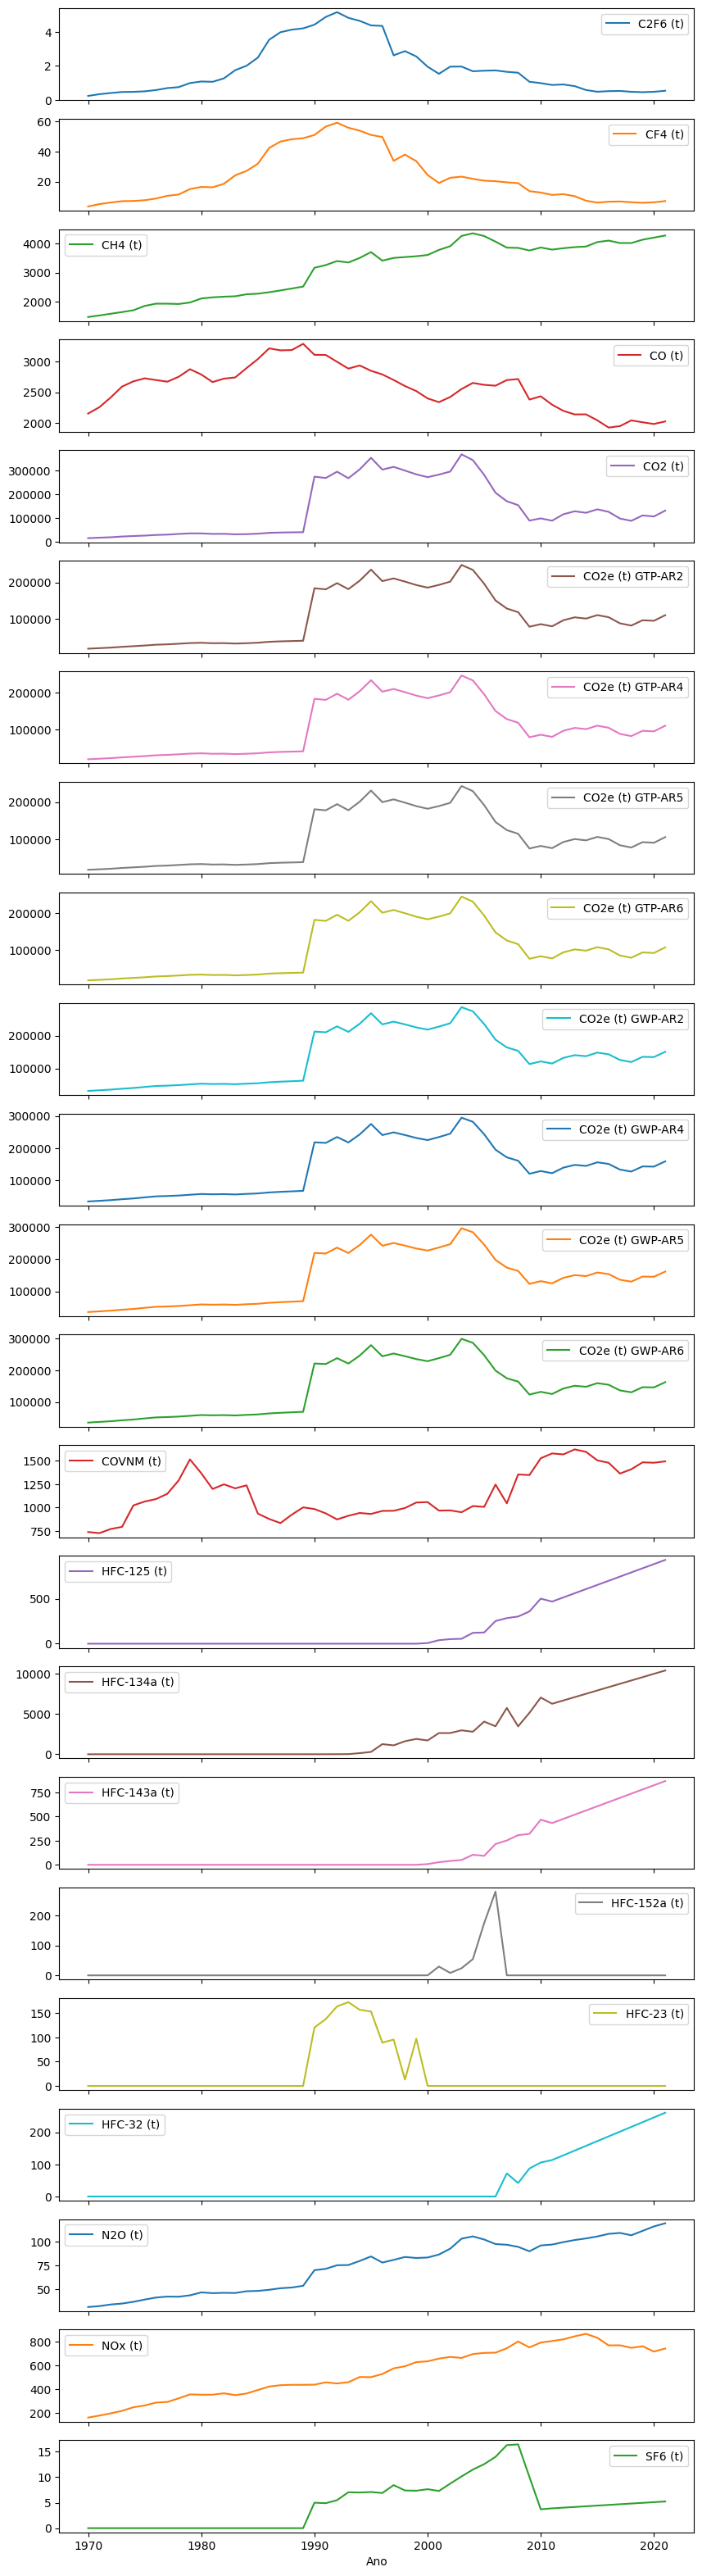

In [44]:
media_emissao_anual.plot(subplots = True, figsize = (10, 40));

### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [45]:
import pandas as pd
url = 'https://github.com/rgrAndrade/Analise_de_Gases_de_Efeito_Estufa/blob/main/Dados/POP2022_Municipios.xls?raw=True'
populacao_estados = pd.read_excel(url, header=1, skipfooter=34)
populacao_estados.head(3)


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107


Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [46]:
populacao_estados.groupby('UF').sum(numeric_only = True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [47]:
populacao_estados['POPULAÇÃO'].astype(int)

ValueError: invalid literal for int() with base 10: '461.748(1)'

In [48]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [49]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                             populacao = lambda x : x.loc[:, 'populacao_sem_parenteses'].replace('\.', '', regex = True))

In [50]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [51]:
populacao_estados = populacao_estados.astype({'populacao':'int64'})

In [52]:
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum().reset_index()
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [53]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,1.647780e+08
1,AL,6.397182e+07
2,AM,-3.536316e+08
3,AP,-1.464334e+08
4,BA,3.005179e+08
5,BR,0.000000e+00
6,CE,1.575001e+08
7,DF,5.303907e+07
8,ES,2.373097e+08
9,GO,3.138403e+08


In [54]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on = 'Estado', right_on = 'UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,1.647780e+08,AC,829780
1,AL,6.397182e+07,AL,3125254
2,AM,-3.536316e+08,AM,3952262
3,AP,-1.464334e+08,AP,774268
4,BA,3.005179e+08,BA,14659023
5,CE,1.575001e+08,CE,8936431
6,DF,5.303907e+07,DF,2923369
7,ES,2.373097e+08,ES,3975100
8,GO,3.138403e+08,GO,6950976
9,MA,5.491927e+08,MA,6800605


Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

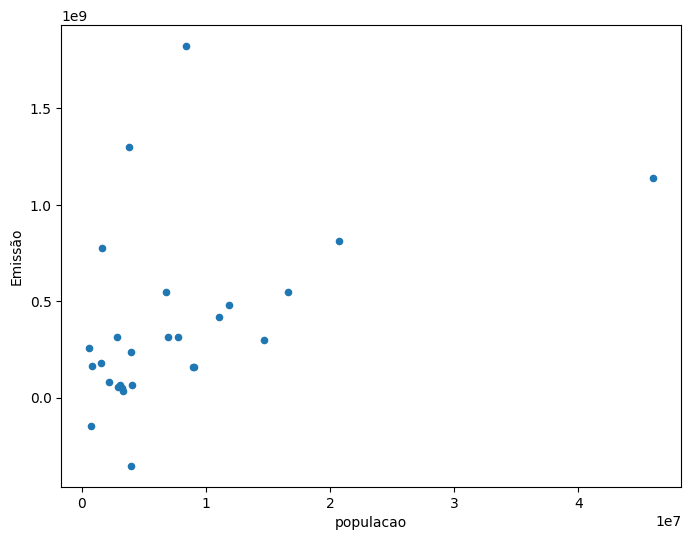

In [55]:
dados_agrupados.plot(x = 'populacao', y= 'Emissão', kind = 'scatter', figsize=(8,6));

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [56]:
import plotly.express as px

In [57]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [58]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending = False)
dados_agrupados

,Estado,Emissão,UF,populacao,emissao_per_capita
20,RO,7.781357e+08,RO,1616379,481.406685
21,RR,2.553918e+08,RR,634805,402.315342
12,MT,1.299280e+09,MT,3784239,343.339916
13,PA,1.824634e+09,PA,8442962,216.113042
0,AC,1.647780e+08,AC,829780,198.580403
26,TO,1.803102e+08,TO,1584306,113.810197
11,MS,3.131680e+08,MS,2833742,110.513958
9,MA,5.491927e+08,MA,6800605,80.756444
7,ES,2.373097e+08,ES,3975100,59.699062
8,GO,3.138403e+08,GO,6950976,45.150532


In [60]:
px.bar(data_frame = dados_agrupados, x = 'Estado', y = 'emissao_per_capita')

In [62]:
import plotly.express as px
import pandas as pd
import numpy as np

# assumindo que 'dados_agrupados' seja seu DataFrame

# Substitua os valores negativos em 'emissao_per_capita' por 0 ou um pequeno valor positivo
dados_agrupados['emissao_per_capita'] = dados_agrupados['emissao_per_capita'].apply(lambda x: max(x, 0.1)) # Substitua negativo por 0,1 ou qualquer positivo
# Ou você pode filtrar seu conjunto de dados
# dados_agrupados = dados_agrupados[dados_agrupados['emissao_per_capita'] > 0]

# Criação do gráfico de dispersão
fig = px.scatter(data_frame=dados_agrupados,
                 x='populacao',
                 y='Emissão',
                 text='Estado',
                 size='emissao_per_capita',
                 title='Scatter Plot with Marker Size based on Emissão per Capita')
fig.show()